# 주제 : 데이터 분석으로 심부전증을 예방할 수 있을까?
----------


    
    
## 데이터 소개
    - 이번 주제는 Heart Failure Prediction 데이터셋을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    heart_failure_clinical_records_dataset.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    age: 환자의 나이
    anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
    creatinine_phosphokinase: 크레아틴키나제 검사 결과
    diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
    ejection_fraction: 박출계수 (%)
    high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
    platelets: 혈소판 수 (kiloplatelets/mL)
    serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
    serum_sodium: 혈중 나트륨 레벨 (mEq/L)
    sex: 성별 (0: 여성, 1: 남성)
    smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
    time: 관찰 기간 (일)
    DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)
    
    
    
- 데이터 출처: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data


## 최종 목표
    - 의료 데이터와 그 분석에 대한 이해
    - Colab 및 Pandas 라이브러리 사용법 이해
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - Classification 모델의 학습과 평가 방법 이해



## Step 0. 의료 데이터셋에 대하여

### 의료 데이터의 수집


 2020년 1월에 데이터 3법이 통과 -핵심은 가명정보를 쓸 수 있게 되었음 (데이터 3법때매 배포환경이 좋아져 바이오 데이터가 뜨고있음) <br> 
 

### 의료 데이터 분석의 현재


### Accuracy, Precision, 그리고 Recall

In [ ]:
정확도(accuracy) -> 

`정밀도 -> TP/TP+FP -> 트루라고 예측한것중 실제 트루인 것 <br>
병에 걸렸어 했는데 실제 병에걸린사람

재현율 -> TP/TP+FN -> 실제 True중 얼마나 맞추었냐 <br>

실제 병결린 사람중 얼만큼 찾아 냈냐 - > recall이 precision 보다 중요

초반엔 recall이 좋아야 좋은 것이라 <br> 리콜을 0.95 이상유지하면서 precision을 떨어뜨리지 않는게 좋은 모델

## Step 1. 데이터셋 준비하기

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [3]:
import os
import glob

In [90]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'robin0309'
os.environ['KAGGLE_KEY'] = "77716f559f9964d9459b7863add36a65"

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [95]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!kaggle datasets download -d andrewmvd/heart-failure-clinical-data
!unzip '*.zip'


  0%|          | 0.00/3.97k [00:00<?, ?B/s]
100%|##########| 3.97k/3.97k [00:00<?, ?B/s]
unzip:  cannot find any matches for wildcard specification "'*.zip'".

No zipfiles found.


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [6]:
os.getcwd()

'C:\\Users\\Administrator\\Desktop\\패캠머신러닝\\Part 1 - 머신러닝 분류 모델\\Chapter 1 - 데이터 분석으로 심부전증을 예방할 수 있을까_'

In [7]:
os.chdir('C:\\Users\\Administrator\\Desktop\\패캠머신러닝\\Part 1 - 머신러닝 분류 모델\\Chapter 1 - 데이터 분석으로 심부전증을 예방할 수 있을까_')

In [8]:
os.listdir('C:\\Users\\Administrator\\Desktop\\패캠머신러닝\\Part 1 - 머신러닝 분류 모델\\Chapter 1 - 데이터 분석으로 심부전증을 예방할 수 있을까_')

['.ipynb_checkpoints',
 'Chapter 01 - 데이터 분석으로 심부전증을 예방할 수 있을까(문제).ipynb',
 'Chapter01 - 데이터 분석으로 심부전증을 예방할 수 있을까(해설).ipynb',
 'heart_failure_clinical_records_dataset.csv']

In [5]:
# pd.read_csv()로 csv파일 읽어들이기
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 데이터프레임의 각 컬럼 분석하기


In [6]:
# DataFrame에서 제공하는 메소드를 이용하여 컬럼 분석하기 (head(), info(), describe())
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### creatinine 의 max가 7861을 보면 outlier를 찾을 수 있음

In [12]:
round(df.describe(),2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00
mean,60.83,0.43,581.84,0.42,38.08,0.35,263358.03,1.39,136.63,0.65,0.32,130.26,0.32
std,11.89,0.50,970.29,0.49,11.83,0.48,97804.24,1.03,4.41,0.48,0.47,77.61,0.47
min,40.00,0.00,23.00,0.00,14.00,0.00,25100.00,0.50,113.00,0.00,0.00,4.00,0.00
25%,51.00,0.00,116.50,0.00,30.00,0.00,212500.00,0.90,134.00,0.00,0.00,73.00,0.00
50%,60.00,0.00,250.00,0.00,38.00,0.00,262000.00,1.10,137.00,1.00,0.00,115.00,0.00
75%,70.00,1.00,582.00,1.00,45.00,1.00,303500.00,1.40,140.00,1.00,1.00,203.00,1.00
max,95.00,1.00,7861.00,1.00,80.00,1.00,850000.00,9.40,148.00,1.00,1.00,285.00,1.00


### 사망자 수

In [13]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [14]:
df.shape

(299, 13)

In [15]:
df[(df['age']>10) & (df['age']<20)]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


### 문제 5. 수치형 데이터의 히스토그램 그리기


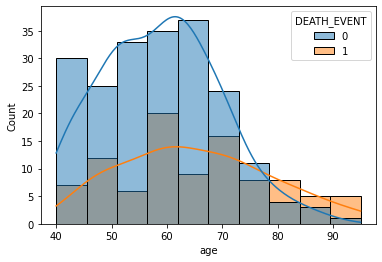

In [16]:
sns.histplot(x='age',hue='DEATH_EVENT',data=df,kde=True)

### creatine 이 3000 아래인 것만 보고 싶을 때

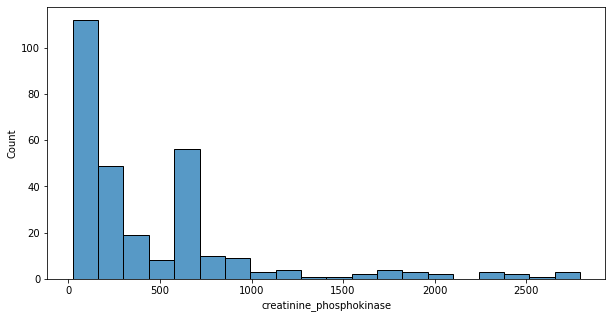

In [18]:
plt.rcParams['figure.figsize'] = [10, 5]
sns.histplot(data=df.loc[df['creatinine_phosphokinase']<3000,'creatinine_phosphokinase'])


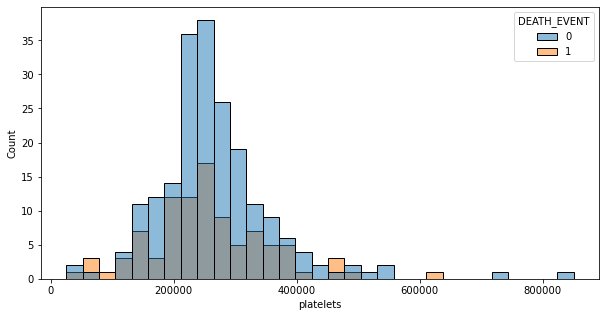

In [19]:
sns.histplot(x='platelets',data=df,hue='DEATH_EVENT')  

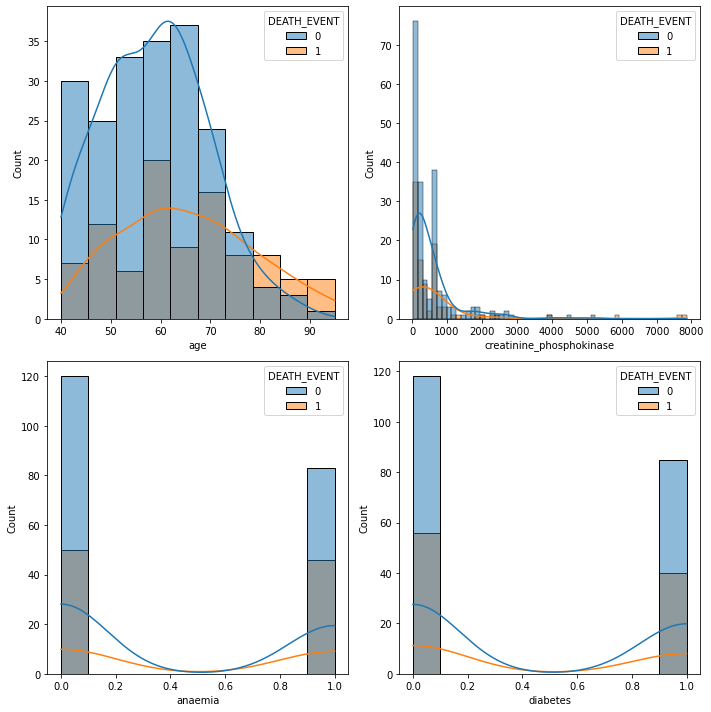

In [9]:
plt.subplot(221)
sns.histplot(x='age',hue='DEATH_EVENT',data=df,kde=True)

plt.subplot(222)
sns.histplot(x='creatinine_phosphokinase',hue='DEATH_EVENT',data=df,kde=True)

plt.subplot(223)
sns.histplot(x='anaemia',hue='DEATH_EVENT',data=df,kde=True)

plt.subplot(224)
sns.histplot(x='diabetes',hue='DEATH_EVENT',data=df,kde=True)

plt.tight_layout()
plt.rcParams["figure.figsize"] = (15, 15)

plt.show()

### 2컬럼의 조인트 스캐러플럿을 보여줌 <br> 뭉쳐서 판단힘들면 알파값주면 투명함으로 보여줌

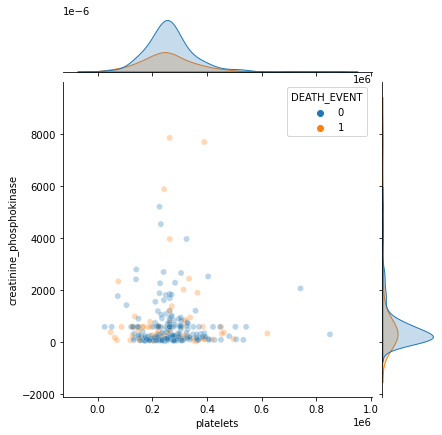

In [21]:
sns.jointplot(x='platelets',y='creatinine_phosphokinase',hue='DEATH_EVENT',alpha=0.3,data=df)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### 문제 6. Boxplot 계열을 이용하여 범주별 통계 확인하기


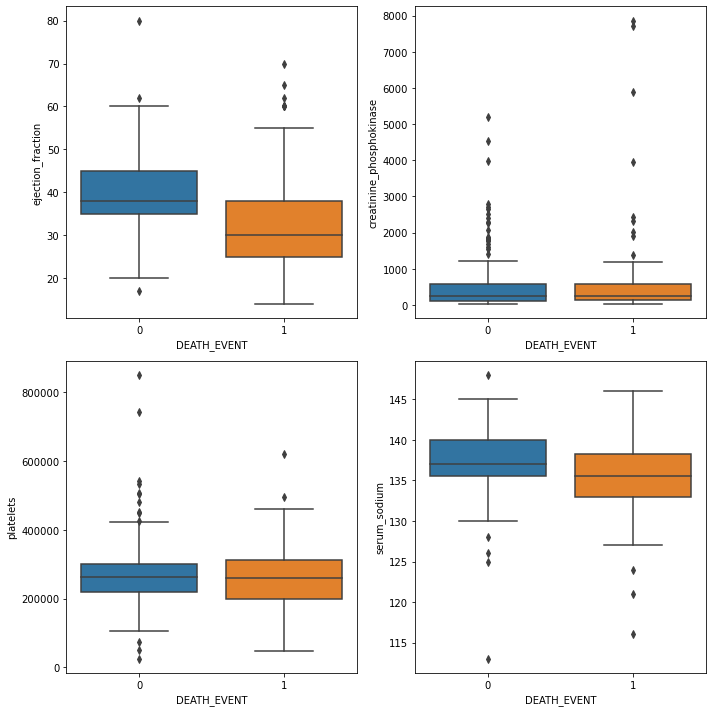

In [19]:
# seaborn의 Boxplot 계열(boxplot(), violinplot(), swarmplot())을 사용
# Hint) hue 키워드를 사용하여 범주 세분화 가능

plt.subplot(221)
sns.boxplot(x='DEATH_EVENT',y='ejection_fraction',data=df)

plt.subplot(222)
sns.boxplot(x='DEATH_EVENT',y='creatinine_phosphokinase',data=df)

plt.subplot(223)
sns.boxplot(x='DEATH_EVENT',y='platelets',data=df)

plt.subplot(224)
sns.boxplot(x='DEATH_EVENT',y='serum_sodium',data=df)

plt.tight_layout()
plt.rcParams["figure.figsize"] = (10, 10)

plt.show()


## Step 3. 모델 학습을 위한 데이터 전처리


### 문제 7. StandardScaler를 이용하여 데이터 전처리하기


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [22]:
# 수치형 입력 데이터, 범주형 입력 데이터, 출력 데이터로 구분하기
X_num = df[['age', 'creatinine_phosphokinase','ejection_fraction', 'platelets','serum_creatinine', 'serum_sodium']]
X_cat = df[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']]
y = df['DEATH_EVENT']

### scaler를 거치면 numpy로 바뀌어서 보통 DataFrame으로 다시바꿔줌

In [23]:
# 수치형 입력 데이터를 전처리하고 입력 데이터 통합하기
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(data=X_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1)

In [24]:
scaler.fit(X_num)
X_scaled=scaler.transform(X_num)

In [25]:
X_scaled

array([[ 1.19294523e+00,  1.65728387e-04, -1.53055953e+00,
         1.68164843e-02,  4.90056987e-01, -1.50403612e+00],
       [-4.91279276e-01,  7.51463953e+00, -7.07675018e-03,
         7.53566018e-09, -2.84552352e-01, -1.41976151e-01],
       [ 3.50832977e-01, -4.49938761e-01, -1.53055953e+00,
        -1.03807313e+00, -9.09000174e-02, -1.73104612e+00],
       ...,
       [-1.33339153e+00,  1.52597865e+00,  1.85495776e+00,
         4.90208200e+00, -5.75030855e-01,  3.12043840e-01],
       [-1.33339153e+00,  1.89039811e+00, -7.07675018e-03,
        -1.26338936e+00,  5.92615005e-03,  7.66063830e-01],
       [-9.12335403e-01, -3.98321274e-01,  5.85388775e-01,
         1.34823057e+00,  1.99578485e-01, -1.41976151e-01]])

In [26]:
X_scaled=pd.DataFrame(data=X_scaled,index=X_num.index,columns=X_num.columns)

In [27]:
X=pd.concat([X_scaled,X_cat],axis=1)

In [28]:
X

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
294,0.098199,-0.537688,-0.007077,-1.109765e+00,-0.284552,1.447094,0,1,1,1,1
295,-0.491279,1.278215,-0.007077,6.802472e-02,-0.187726,0.539054,0,0,0,0,0
296,-1.333392,1.525979,1.854958,4.902082e+00,-0.575031,0.312044,0,1,0,0,0
297,-1.333392,1.890398,-0.007077,-1.263389e+00,0.005926,0.766064,0,0,0,1,1


### 문제 8. 학습데이터와 테스트데이터 분리하기


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

## Step 4. Classification 모델 학습하기


### 문제 9. Logistic Regression 모델 생성/학습하기


In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression(max_iter=1000)

In [33]:
model_lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

### 문제 10. 모델 학습 결과 평가하기


In [34]:
from sklearn.metrics import classification_report

In [35]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.78      0.92      0.84        64
           1       0.64      0.35      0.45        26

    accuracy                           0.76        90
   macro avg       0.71      0.63      0.65        90
weighted avg       0.74      0.76      0.73        90



### 문제 11. XGBoost 모델 생성/학습하기


In [41]:
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
# XGBClassifier 모델 생성/학습
model_GB=GradientBoostingClassifier()
model_GB.fit(X_train,y_train)

GradientBoostingClassifier()

In [48]:
pred=model_GB.predict(X_test)

### 문제 12. 모델 학습 결과 평가하기


In [49]:
# Predict를 수행하고 classification_report() 결과 출력하기

print(classification_report(y_test, pred))



              precision    recall  f1-score   support

           0       0.78      0.88      0.82        64
           1       0.56      0.38      0.45        26

    accuracy                           0.73        90
   macro avg       0.67      0.63      0.64        90
weighted avg       0.71      0.73      0.72        90



### 문제 13. 특징의 중요도 확인하기


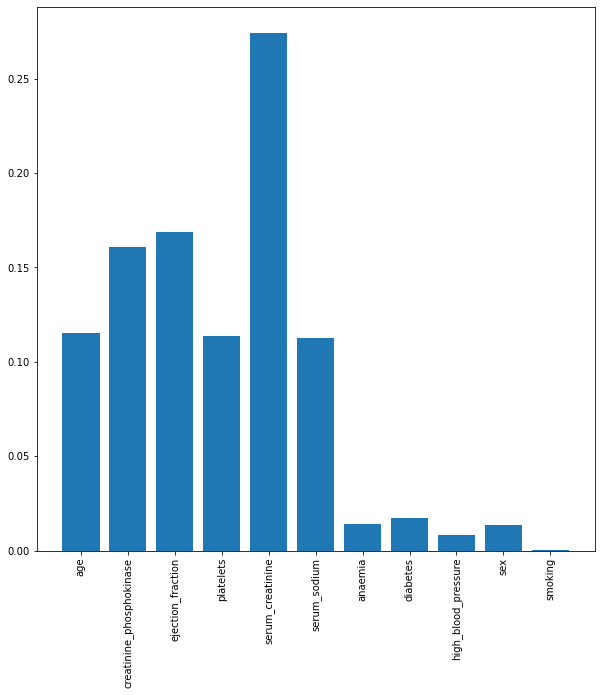

<Figure size 720x720 with 0 Axes>

In [56]:
# XGBClassifier 모델의 feature_importances_를 이용하여 중요도 plot

plt.bar(X.columns,model_GB.feature_importances_)
plt.xticks(rotation=90)
plt.figure(figsize=(10,10))
plt.show()


In [65]:
from xgboost import XGBClassifier

In [66]:
model_xgb=XGBClassifier()

In [67]:
model_xgb.fit(X_train,y_train)

[15:03:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Administrator\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
pred=model_xgb.predict(X_test)


In [72]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        64
           1       0.62      0.50      0.55        26

    accuracy                           0.77        90
   macro avg       0.72      0.69      0.70        90
weighted avg       0.76      0.77      0.76        90



### feature importance

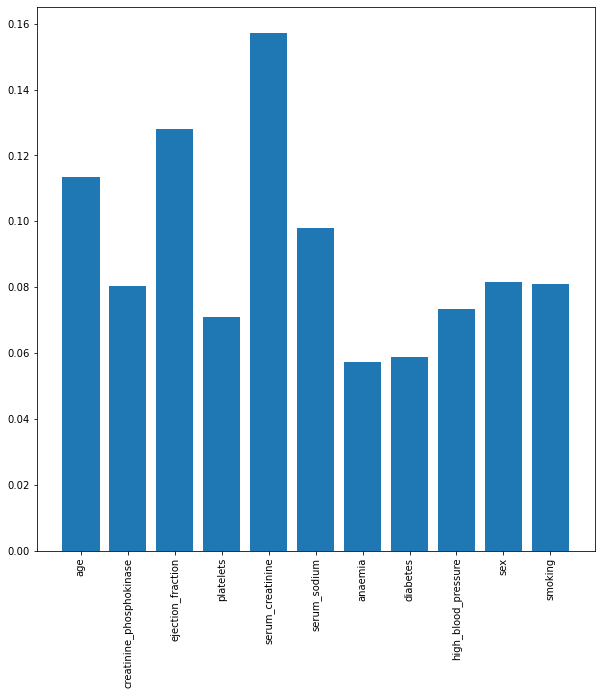

<Figure size 720x720 with 0 Axes>

In [75]:
plt.bar(X.columns,model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.figure(figsize=(10,10))
plt.show()

## Step5 모델 학습 결과 심화 분석하기


### 문제 14. Precision-Recall 커브 확인하기

In [76]:
from sklearn.metrics import plot_precision_recall_curve

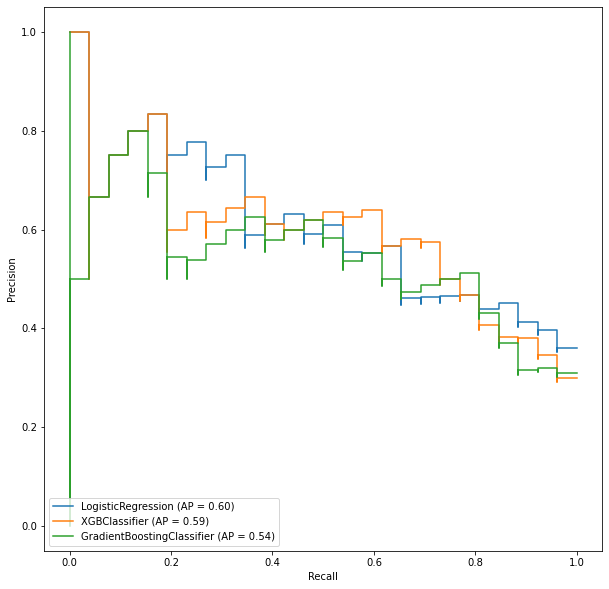

In [88]:
# 두 모델의 Precision-Recall 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)
fig = plt.figure()
ax = fig.gca()
plot_precision_recall_curve(model_lr, X_test, y_test, ax=ax)
plot_precision_recall_curve(model_xgb, X_test, y_test, ax=ax)
plot_precision_recall_curve(model_GB, X_test, y_test, ax=ax)

### 문제 15. ROC 커브 확인하기

In [85]:
from sklearn.metrics import plot_roc_curve

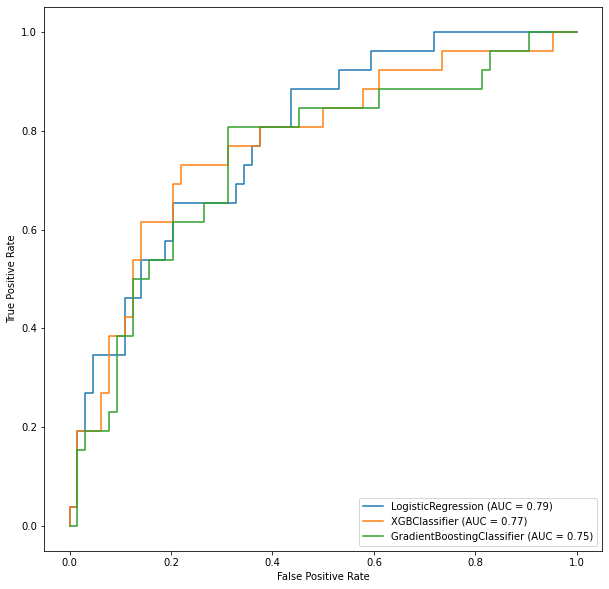

In [87]:
# 두 모델의 ROC 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)
fig = plt.figure()
ax = fig.gca()
plot_roc_curve(model_lr, X_test, y_test, ax=ax)
plot_roc_curve(model_xgb, X_test, y_test, ax=ax)
plot_roc_curve(model_GB, X_test, y_test, ax=ax)